# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdax
from tqdm import tqdm_notebook
%matplotlib inline  

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

In [3]:
from datetime import datetime
from datetime import timedelta
import calendar

In [4]:
# plotly.tools.set_credentials_file(username='gasia44', api_key='WquddqqfPKg5KJfPJFuk')

In [56]:
import glob
df = []
for name in glob.glob('done_'+'*.csv'):
    df.append(pd.read_csv(name, parse_dates =(['timestamp'])).set_index('timestamp'))
    
hh = pd.read_csv('btc_mins_160000_500000.csv', parse_dates =(['timestamp'])).set_index('timestamp')
df.append( hh)

In [54]:
all_data = pd.concat(df)

In [55]:
np.sum(all_data['price_change'].isnull().values)

65340

In [52]:
all_data[all_data['price_change'].isnull().values]

,Unnamed: 0,category_id,message_author,message_number,message_text,mins_after,mins_before,polarity,price_change,quoteheader,subjectivity,topic_id,topic_title
timestamp,,,,,,,,,,,,,
2016-06-07 22:22:00,NaN,57,RyNinDaCleM,10,negative digits 8) I make money taking bitcoi...,578.140000,NaN,0.100000,NaN,NaN,0.700000,1501838,what is your average price if you have more th...
2016-06-07 22:22:00,NaN,57,RyNinDaCleM,10,negative digits 8) I make money taking bitcoi...,578.140000,NaN,0.100000,NaN,NaN,0.700000,1501838,what is your average price if you have more th...
2016-06-07 22:22:00,NaN,57,Meuh6879,15,Just the shit- UP ... lag. http://imagize...,578.140000,NaN,-0.200000,NaN,"Quote from: AlexGR on June 07, 2016, 08:24:44 ...",0.800000,1502745,Scammy shit going on-Someone sold 0.09 btc at ...
2016-06-07 22:22:00,NaN,57,mkc,11,Then choose below 30. Congratulations being su...,578.140000,NaN,0.116071,NaN,"Quote from: shorena on June 07, 2016, 09:16:47...",0.648214,1501838,what is your average price if you have more th...
2016-06-07 22:22:00,NaN,57,mkc,11,Then choose below 30. Congratulations being su...,578.140000,NaN,0.116071,NaN,"Quote from: shorena on June 07, 2016, 09:16:47...",0.648214,1501838,what is your average price if you have more th...
2016-06-11 12:00:00,NaN,57,BTC_Markets,176,https://pbs.twimg.com/media/Ckp7fJmWsAE7eV9.jp...,NaN,585.168500,0.500000,NaN,NaN,0.500000,1360104,[Trade Ideas] Whaleclub.co's Fresh Bitcoin Tra...
2016-06-11 12:00:00,NaN,57,BTC_Markets,176,https://pbs.twimg.com/media/Ckp7fJmWsAE7eV9.jp...,NaN,585.168500,0.500000,NaN,NaN,0.500000,1360104,[Trade Ideas] Whaleclub.co's Fresh Bitcoin Tra...
2016-06-11 12:02:00,NaN,57,Rukusilf,100,I think the price of bitcoin will never go to ...,NaN,585.223333,0.000000,NaN,"Quote from: Cryptock on June 09, 2016, 08:23:2...",0.433333,1330445,BTC is going back to $400
2016-06-11 12:04:00,NaN,57,talkbitcoin,19,yeah it always takes a little bit of time to r...,NaN,585.265000,0.001694,NaN,"Quote from: Next BillG on June 11, 2016, 10:00...",0.402056,1491745,[POLL]New ATH?


# Read Data

### Price

In [5]:
df_1 = pd.read_csv('bitcoin_data_one_minute_2016_2017.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [6]:
df_2 = pd.read_csv('bitcoin_data_one_minute_2017_2018.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [7]:
# df_3 = pd.read_csv('bitcoin_data_one_minute_2015_2016.csv', parse_dates = ['timestamp']).set_index('timestamp')

In [8]:
frames = [df_1, df_2]
btc_price_df = pd.concat(frames)

In [9]:
btc_price_df.sort_index(inplace=True)

In [10]:
btc_price_df.index = pd.to_datetime(btc_price_df.index)

-----------------------

### Forum

In [11]:
btc_forum_df = pd.read_csv('btc_forum_cleaned_new_pos_neg_sub.csv')
btc_forum_df.set_index('timestamp', inplace=True)
btc_forum_df.index = pd.to_datetime(btc_forum_df.index)

# clear seconds

In [12]:
btc_price_df.index = btc_price_df.index.map(lambda x: x.replace(second=0))
btc_forum_df.index = btc_forum_df.index.map(lambda x: x.replace(second=0))

-----------------

# price average 5 min

In [13]:
btc_price_df['mean'] = btc_price_df.loc[:,["close", 'open', 'low', 'high']].mean(axis = 1)

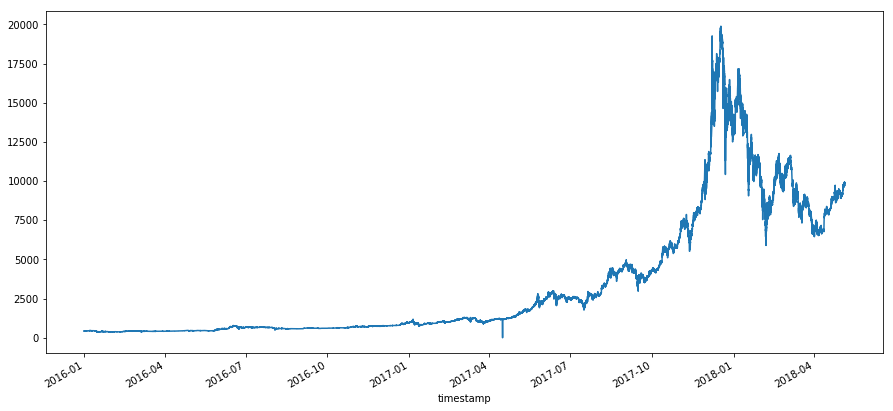

In [14]:
btc_price_df['mean'].plot(figsize = (15,7))

In [15]:
btc_forum_df['price_change'] = 0.0
btc_forum_df['mins_before'] = 0.0
btc_forum_df['mins_after'] = 0.0

In [17]:
minutes_time = 5
min_range = 140000
max_range = 160000
btc_forum_df = btc_forum_df[min_range: max_range]

for reply_index in tqdm_notebook(range(len(btc_forum_df))):
    mins_before = btc_price_df[(btc_forum_df.index[reply_index] - timedelta( minutes = minutes_time)):btc_forum_df.index[reply_index] - timedelta( minutes = 1)]['mean'].mean()
    mins_after = btc_price_df[btc_forum_df.index[reply_index]:(btc_forum_df.index[reply_index] + timedelta( minutes = minutes_time))]['mean'].mean()
    btc_forum_df['mins_before'][reply_index] = mins_before
    btc_forum_df['mins_after'][reply_index] = mins_after
    btc_forum_df['price_change'][reply_index] = np.log(mins_after/ mins_before)    

HBox(children=(IntProgress(value=0, max=20000), HTML(value='')))

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/gasia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
btc_forum_df.to_csv('done_btc_mins_'+str(min_range)+'_'+str(max_range)+'.csv')